In [4]:
## Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Generate Random data
##### Y = 2 + 3 *x + random error
##### x - data randomly generated

In [12]:
## Generate Random data

np.random.seed(0)
x = np.random.rand(100,1)
y = 2 + 3*x + np.random.rand(100,1)

#### Linear Regression from Sklearn

Slope: [[2.93655106]]
Intercept: [2.55808002]
r_2: 0.9038655568672764
mean_square_error: 0.07623324582875007


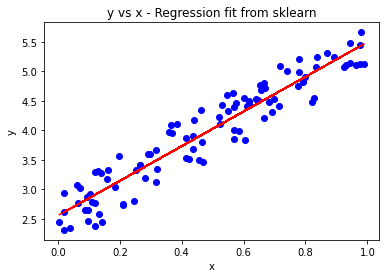

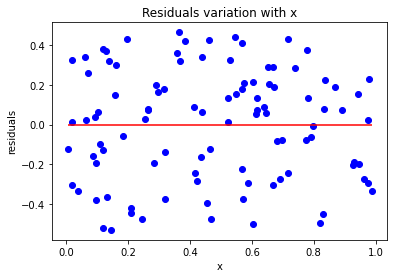

In [13]:
## Model building using Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg_model = LinearRegression() # Model initialization
reg_model.fit(x,y) # Model fit
y_hat = reg_model.predict(x) # Prediction

# Model evaluation
r_2 = r2_score(y,y_hat)
mn_sqr_err = mean_squared_error(y,y_hat)

# Print Model coefficients
print('Slope:',reg_model.coef_)
print('Intercept:',reg_model.intercept_)
print('r_2:',r_2)
print('mean_square_error:',mn_sqr_err)

# plotting
plt.figure(figsize=(6,4))
plt.scatter(x,y,color='blue')
plt.plot(x,y_hat,c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x - Regression fit from sklearn')
plt.show()

# Residual plot
resid = y-y_hat
plt.figure(figsize=(6,4))
plt.scatter(x,resid,color='blue')
plt.hlines(y=0,xmin = min(x)[0], xmax = max(x)[0],colors='r')
plt.xlabel('x')
plt.ylabel('residuals')
plt.title('Residuals variation with x')
plt.show()

####  Linear Regression through OLS

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     921.4
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           1.22e-51
Time:                        19:42:20   Log-Likelihood:                -13.196
No. Observations:                 100   AIC:                             30.39
Df Residuals:                      98   BIC:                             35.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5581      0.054     47.751      0.0

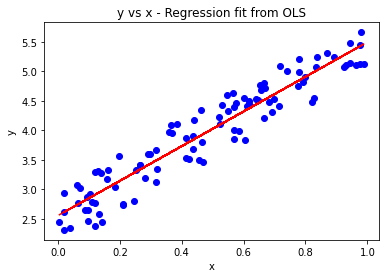

In [15]:
import statsmodels.api as sm

# add constant
x_OLS = sm.add_constant(x)
OLS = sm.OLS(y,x_OLS)
OLS_mdl = OLS.fit()
print(OLS_mdl.summary())

OLS_pred = OLS_mdl.predict(x_OLS)

OLS_resid = np.concatenate(y,axis=0)-OLS_pred

# plotting
plt.figure(figsize=(6,4))
plt.scatter(x,y,color='blue')
plt.plot(x,OLS_pred,c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x - Regression fit from OLS')
plt.show()

In [51]:
r_2 = r2_score(y,OLS_pred)
print(r_2)

0.9038655568672764


#### Closed Form solution
##### $\theta$ = Inverse($X^{T}$$X$).($X^{T}$$Y$)

theta_0: 2.5580800241570163
theta_1: 2.936551060203776
Actual theta_0: 2
Actual theta_1: 3


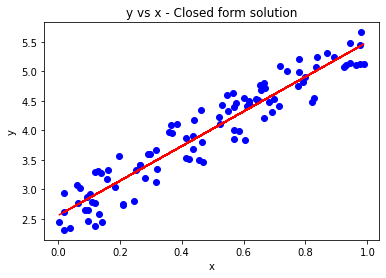

In [24]:
x_with_const = np.c_[np.ones((100,1)),x]
theta_clsd_form = np.dot(np.linalg.inv(np.dot(x_with_const.transpose(),x_with_const)),np.dot(x_with_const.transpose(),y))
print('theta_0:',theta_clsd_form[0][0])
print('theta_1:',theta_clsd_form[1][0])

print('Actual theta_0:',2)
print('Actual theta_1:',3)

y_pred = np.dot(x_with_const,theta_clsd_form)

plt.figure(figsize=(6,4))
plt.plot(x,y_pred,'r-')
plt.scatter(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x - Closed form solution')
plt.show()

#### Gradient Descent Method

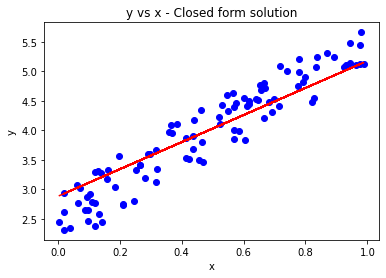

r_2 score: 0.8596504685427865


In [29]:
theta = np.random.rand(2,1)
n_iter = 1000
alpha = 0.01
def gradient_des(x,y,theta,alpha,n_iter):
    cost_func_hist = np.zeros((n_iter))
    theta_hist = np.zeros((n_iter,2))
    for iter in range(n_iter):
        H_theta = x_with_const.dot(theta)
        gradient = np.dot(x.T,(H_theta-y))
        theta = theta - (alpha/len(x))*gradient
        cost_func_hist[iter] = np.dot((H_theta-y).T,H_theta-y)[0][0]
        theta_hist[iter] = theta.reshape(1,2)
    return(theta,theta_hist,cost_func_hist)

theta_GD,theta_hist,cost_func_hist = gradient_des(x_with_const,y,theta,alpha,n_iter)

z = np.dot(x_with_const,theta_GD)

plt.figure(figsize=(6,4))
plt.plot(x,y_pred_GD,'r-')
plt.scatter(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x - Closed form solution')
plt.show()

print('r_2 score:',r2_score(y,y_pred_GD))

##### Above accuracy is less than r_square from OLS

#### Tune learning parameter (alpha) parameter

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


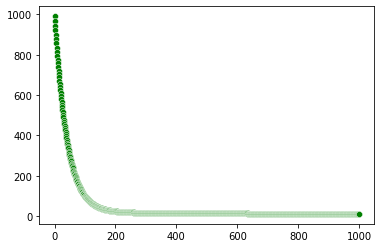

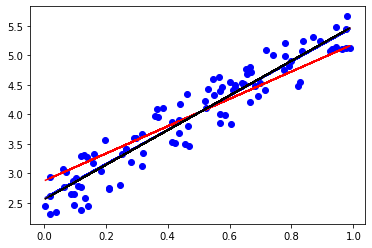

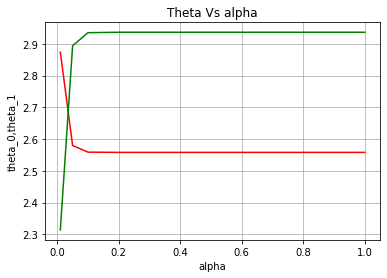

In [38]:
sns.scatterplot(list(np.arange(n_iter)),cost_func_hist,color='green')

alpha_lst = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
colors = ['r-','b-','y-','g-','m-','k-']
theta_0_lr_var = {}
theta_1_lr_var = {}
cost_func_lr_var = {}
y_pred_lr_var = {}


iter = 0
plt.figure(figsize=(6,4))
for alpha_val in alpha_lst:
    
    temp_theta_val, temp_theta_hist, temp_cost_func_hist = gradient_des(x_with_const,y,theta,alpha_val,n_iter)
    
    y_pred_lr_var[alpha_val] = np.dot(x_with_const,temp_theta_val)
   
    theta_0_lr_var[alpha_val] = temp_theta_val[0][0]
    theta_1_lr_var[alpha_val] = temp_theta_val[1][0]
    
    cost_func_lr_var[alpha_val] = temp_cost_func_hist
    
    if iter==0:
        plt.scatter(x,y,color='blue')
    
    plt.plot(x,y_pred_lr_var[alpha_val],colors[iter])
    
    iter += 1
plt.show()
    
plt.figure(figsize=(6,4))
sns.lineplot(x=list(theta_0_lr_var.keys()),y=list(theta_0_lr_var.values()),color='r')
sns.lineplot(x=list(theta_1_lr_var.keys()),y=list(theta_1_lr_var.values()),color='g')
plt.grid()
plt.xlabel('alpha')
plt.ylabel('theta_0,theta_1')
plt.title('Theta Vs alpha')
plt.show()

In [43]:
theta_0_lr_var

{0.01: 2.873682732731874,
 0.05: 2.5795578497733516,
 0.1: 2.5588189671672357,
 0.2: 2.55808086938877,
 0.5: 2.558080024157025,
 1.0: 2.5580800241570234}

In [44]:
theta_1_lr_var

{0.01: 2.3137593787673034,
 0.05: 2.894169604043114,
 0.1: 2.9350929293225487,
 0.2: 2.9365493923369668,
 0.5: 2.936551060203761,
 1.0: 2.9365510602037648}

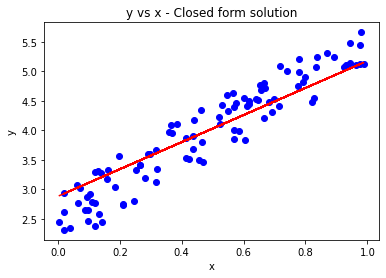

r_2 score: 0.8596504685427865


In [52]:
## Finalized model
alpha=0.2

theta_GD,theta_hist,cost_func_hist = gradient_des(x_with_const,y,theta,alpha,n_iter)

z = np.dot(x_with_const,theta_GD)

plt.figure(figsize=(6,4))
plt.plot(x,y_pred_GD,'r-')
plt.scatter(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x - Closed form solution')
plt.show()

print('r_2 score:',r2_score(y,y_pred_GD))

In [47]:
theta_GD

array([[2.55881897],
       [2.93509293]])

In [49]:
theta_clsd_form

array([[2.55808002],
       [2.93655106]])